<a href="https://colab.research.google.com/github/hanyoseob/lecture_optimization/blob/main/chapter02_Optimization_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization problem
---
Below equation is a standard form of an objective function to solve an optimization problem.
>$x^* = \arg \min_{x} F(x) + \lambda R(x)$,

where $F(\cdot)$ denotes the fidelity term, $R(\cdot)$ is the regularization term (or penalty term), and $\lambda$ is hyper-parameter to balance between the fidelity term $F(x)$ and the regularization term $R(x)$.

Commonly, the fidelity term $F(x)$ is formulated by

>$F(x) = \frac{1}{2} || Ax - y ||_2^2$,

where $A$ denotes a system matrix and $y$ is measurement collected from the system matrix $A$.
In previous Chapter 1, we used a Gaussian-blur kernel as the system matrix $A$.

In addition, the regularization term $R(x)$ is used like total variation (TV), low-rankness, etc.

1. Total variation (TV) panelty
>$R(x) = |D_{\textrm{x}}(x)| + |D_{\textrm{y}}(x)|$,

  where $D_{\textrm{x}}(\cdot)$ and $D_{\textrm{y}}(\cdot)$ are differentiation along the $\textrm{x}$-axis and $\textrm{y}$-axis, respectively.

2. Low-rankness
>$R(x) = \textrm{RANK}(x) < k$,

  where $k$ is the rank-constraint of $x$.


Below formulation is the standard form of the objective function we are dealing with.

>$x^* = \arg \min_{x} \frac{1}{2} || A x - y ||_2^2 + \lambda R(x)$


# Various optimization solvers
---

To find a optimal solve $x^*$ satisfying above objective function, we will implement various optimization solvers such as 

1. [Gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent)
2. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)
3. [Conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
4. [Iterative Shrinkage-Thresholding Algorithm](http://www.cs.cmu.edu/afs/cs/Web/People/airg/readings/2012_02_21_a_fast_iterative_shrinkage-thresholding.pdf)
5. [Fast Iterative Shrinkage-Thresholding Algorithm](http://www.cs.cmu.edu/afs/cs/Web/People/airg/readings/2012_02_21_a_fast_iterative_shrinkage-thresholding.pdf)
6. [Alternating Direction Method of Multipliers](https://web.stanford.edu/~boyd/papers/pdf/admm_distr_stats.pdf)


# [Gradient Descent Method](https://en.wikipedia.org/wiki/Gradient_descent)
---
___Gradient descet method___ is a first-order iterative optimization algorithm for finding a local minumum of a differentiable function.

___Before following an implementation below, PLEASE REVIEW [MATHMETICAL DSCRIPTION](https://en.wikipedia.org/wiki/Gradient_descent) since the more details are described [HERE](https://en.wikipedia.org/wiki/Gradient_descent).___


## General solution
---
> $x_{n+1} = x_n - \lambda_n \nabla F(x_n)$,

where $F(\cdot)$ and $\nabla F(\cdot)$ are any objective function and its derivative function, respectively, and $\lambda_n$ is step size.


# Implementation
---

1. Problem definition
2. Implement the gradient descent method

## Step 1. Problem definition

1. Objective function $F(x)$
> $F(x) = x^2$

2. its derivative $\nabla F(x)$
> $\nabla F(x) = 2x$

3. Global solution

  > $x_{n+1} = x_n - \lambda_n \nabla F(x_n)$

  > $x_{n+1} = x_n - \lambda_n(2x_n)$


## Step 2. Gradient descent method

1. Add packages
2. Set the parameters of the gradient decent method
3. Solution traces with the __large__ step size
4. Solution traces with the __small__ step size

### Add packages

In [ ]:
# Mathmetical packages
import numpy as np

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 10}

matplotlib.rc('font', **font)


### Set the parameters of the gradient descent method

In [ ]:
# F: Objective function
# dF: Its derivative
F = lambda x: x**2
dF = lambda x: 2*x

# Plot the objective function space
x_smp = 1000
x_rng = [-5, 5]
x_set = np.linspace(x_rng[0], x_rng[1], x_smp)
y_set = F(x_set)

# Hyper parameters for the gradient descent method
max_iter = 1000

# intial point of x
x0 = 4.8

### Solution traces with the __large__ step size

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


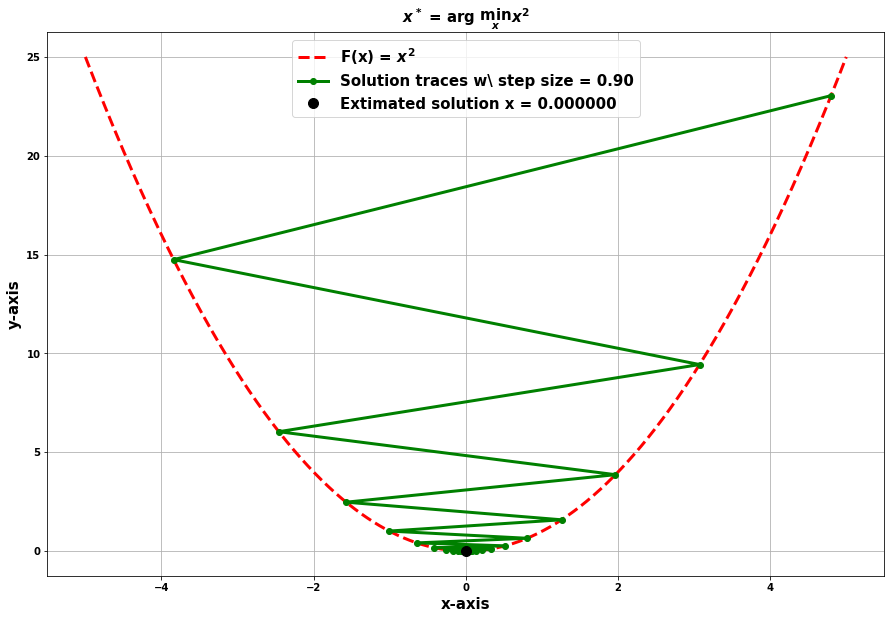

In [ ]:
x = x0

x_iter = []
y_iter = []

x_iter.append(x)
y_iter.append(F(x))

# Set the large step size
step_size_large = 9e-1

# Search the solution using the gradient descent method
for i in range(1, max_iter + 1):

  # Grdient descent method
  x = x - step_size_large * dF(x)

  x_iter.append(x)
  y_iter.append(F(x))

x_iter_large = x_iter
y_iter_large = y_iter

# Plot the solution traces with large step size
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

axs.plot(x_set, y_set, 'r--', label='F(x) = $x^2$', linewidth=3)
axs.plot(x_iter_large, y_iter_large, 'go-', label='Solution traces w\ step size = %.2f' % step_size_large, linewidth=3)
axs.plot(x_iter_large[-1], y_iter_large[-1], 'ko', label='Extimated solution x = %.6f' % x_iter[-1], markersize=10)
axs.legend(fontsize=15)
axs.grid(True)
axs.set_xlabel('x-axis', fontsize=15, fontweight='bold')
axs.set_ylabel('y-axis', fontsize=15, fontweight='bold')
axs.set_title('$x^*$ = arg $\min_x x^2$', fontsize=15, fontweight='bold')

plt.show()


### Solution traces with the __small__ step size

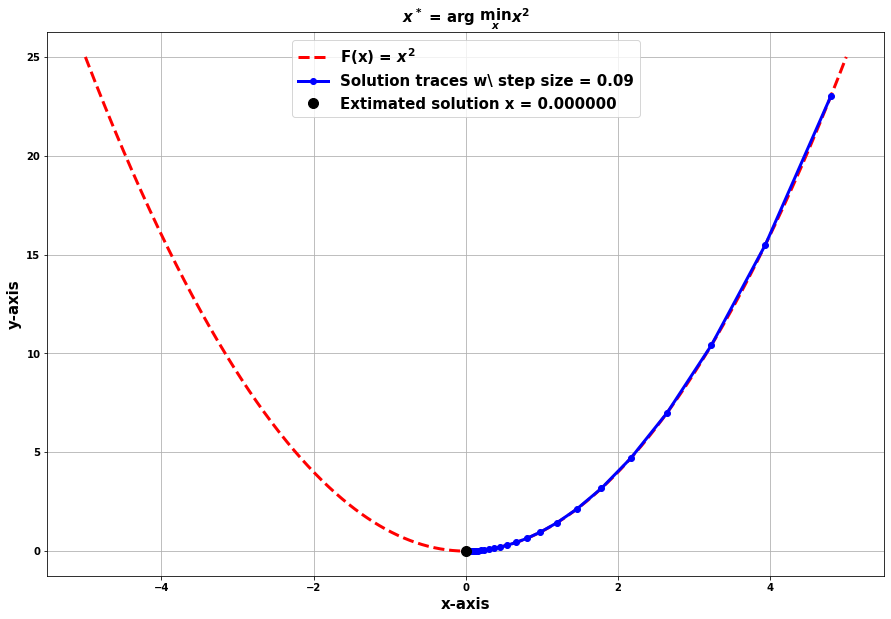

In [ ]:
x = x0

x_iter = []
y_iter = []

x_iter.append(x)
y_iter.append(F(x))

# Set the small step size
step_size_small = 9e-2

# Search the solution using the gradient descent method
for i in range(1, max_iter + 1):

  # Grdient descent method
  x = x - step_size_small * dF(x)

  x_iter.append(x)
  y_iter.append(F(x))

x_iter_small = x_iter
y_iter_small = y_iter

# Plot the solution traces with large step size
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

axs.plot(x_set, y_set, 'r--', label='F(x) = $x^2$', linewidth=3)
axs.plot(x_iter_small, y_iter_small, 'bo-', label='Solution traces w\ step size = %.2f' % step_size_small, linewidth=3)
axs.plot(x_iter_small[-1], y_iter_small[-1], 'ko', label='Extimated solution x = %.6f' % x_iter[-1], markersize=10)
axs.legend(fontsize=15)
axs.grid(True)
axs.set_xlabel('x-axis', fontsize=15, fontweight='bold')
axs.set_ylabel('y-axis', fontsize=15, fontweight='bold')
axs.set_title('$x^*$ = arg $\min_x x^2$', fontsize=15, fontweight='bold')

plt.show()


# Conclusion

Below figure shows the solution traces depending on the step size.
The solution trace decreases rapidly when the step size is large, but they fluctuates significantly.
On the other hand, a smaller step size results in a stable reduction of the trace, but requires a longer convergence time than a larger step size.

___It is similar to the concept of learning rate in the field of deep learning.___

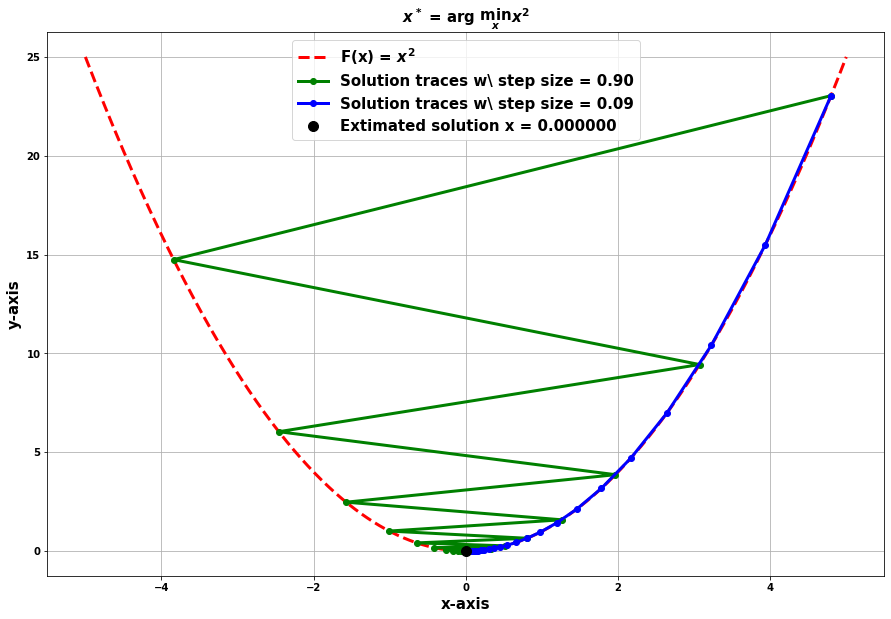

In [ ]:
# Plot the solution traces depending on various step size
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

axs.plot(x_set, y_set, 'r--', label='F(x) = $x^2$', linewidth=3)
axs.plot(x_iter_large, y_iter_large, 'go-', label='Solution traces w\ step size = %.2f' % step_size_large, linewidth=3)
axs.plot(x_iter_small, y_iter_small, 'bo-', label='Solution traces w\ step size = %.2f' % step_size_small, linewidth=3)
axs.plot(x_iter_small[-1], y_iter_small[-1], 'ko', label='Extimated solution x = %.6f' % x_iter[-1], markersize=10)
axs.legend(fontsize=15)
axs.grid(True)
axs.set_xlabel('x-axis', fontsize=15, fontweight='bold')
axs.set_ylabel('y-axis', fontsize=15, fontweight='bold')
axs.set_title('$x^*$ = arg $\min_x x^2$', fontsize=15, fontweight='bold')

plt.show()

#References
---

1. [Gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent)
2. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)
3. [Conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
4. [Iterative Shrinkage-Thresholding Algorithm](http://www.cs.cmu.edu/afs/cs/Web/People/airg/readings/2012_02_21_a_fast_iterative_shrinkage-thresholding.pdf)
5. [Fast Iterative Shrinkage-Thresholding Algorithm](http://www.cs.cmu.edu/afs/cs/Web/People/airg/readings/2012_02_21_a_fast_iterative_shrinkage-thresholding.pdf)
6. [Alternating Direction Method of Multipliers](https://web.stanford.edu/~boyd/papers/pdf/admm_distr_stats.pdf)


# Next
---

[Next chapter](https://colab.research.google.com/drive/1tlOUw92mmyWnUW2f72DfeR0EK8RhkKtT?usp=sharing), we will implement the [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent) to solve a 2D optimization problem.